<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/MLP_week_9_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [7]:
data = load_iris(as_frame=True)

In [8]:
X=data.data
y=data.target

In [10]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [13]:
from sklearn.cluster import KMeans

In [15]:
#"init": "random",    "n_init": 50,    "max_iter": 500,    "random_state": 10
cluster = KMeans(init='random',n_init=50, max_iter=500, random_state=10 )

In [16]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [17]:
cluster.fit(X,y)

KMeans(init='random', max_iter=500, n_init=50, random_state=10)

In [20]:
cluster.inertia_

30.01588095238096

In [21]:
cluster.cluster_centers_

array([[5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [24]:
n_clusters_inertia=[]
for i in range(1, 13):
  cluster = KMeans(n_clusters=i,init='random',n_init=50, max_iter=500, random_state=10 )
  cluster.fit(X,y)
  n_clusters_inertia.append(cluster.inertia_)

In [25]:
n_clusters_inertia

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.29822966507178,
 30.01588095238096,
 28.14693893387315,
 26.72362757237603,
 24.374128327812535,
 23.3371026867869]

In [33]:
from matplotlib import pyplot as plt

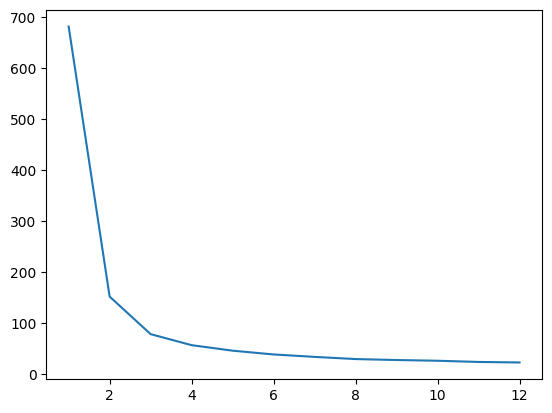

In [34]:
plt.plot(range(1, 13), n_clusters_inertia)

#AgglomerativeClustering¶


In [37]:
from sklearn.cluster import AgglomerativeClustering

algo = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [38]:
algo.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [40]:
algo.n_leaves_

150

In [43]:
algo.labels_[-1]

0

# Practice Assignment 9.2 - Not Graded

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

dataset - "https://drive.google.com/file/d/10Dj5jGYoqc7T5AMV_jBXJzDQQscHbrQ9/view?usp=sharing"

In [44]:
Url = 'https://raw.githubusercontent.com/dineshkumarsarangapani/Machine_learning_IITM/main/MLP/diabetes/diabetes.csv'

In [45]:
import pandas as pd

train_data = pd.read_csv(Url)

In [46]:
train_data.shape

(768, 9)

In [47]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
train_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
train_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [50]:
train_data.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [51]:
train_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
from sklearn.pipeline import Pipeline


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [104]:
pipe = Pipeline([("scale", StandardScaler()), ("mlp",MLPClassifier((10,10,10),activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=100, random_state=1,early_stopping=True) )])

In [105]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('mlp',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(10, 10, 10),
                               learning_rate_init=0.2, max_iter=100,
                               random_state=1, solver='sgd'))])

In [106]:
y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
y_pred_train

array([2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [109]:
accuracy_score(y_train, y_pred_train)

0.925

In [110]:
pipe.score(X_train, y_train)

0.925

In [111]:
pipe.score(X_test, y_test)

0.8666666666666667

In [112]:
pipe[-1].intercepts_[1].shape

(10,)

In [113]:
MLPClassifier?

In [114]:
nus = len(pipe[-1].loss_curve_)

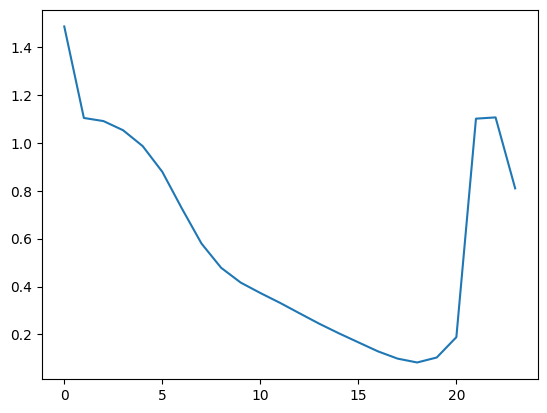

In [115]:
plt.plot(range(0, nus), pipe[-1].loss_curve_)